In [1]:
import sys
import os

print(sys.path)
sys.path.append("../")

['/home/filippo/GarbageDetectionAndSegmentation/notebooks', '/home/filippo/anaconda3/envs/siv_regular/lib/python310.zip', '/home/filippo/anaconda3/envs/siv_regular/lib/python3.10', '/home/filippo/anaconda3/envs/siv_regular/lib/python3.10/lib-dynload', '', '/home/filippo/.local/lib/python3.10/site-packages', '/home/filippo/anaconda3/envs/siv_regular/lib/python3.10/site-packages']


In [2]:
import imageio.v3 as iio
import joblib

import random as rand
import numpy as np 
import cv2
import glob
import time

import matplotlib.pyplot as plt
%matplotlib inline

from utils import convert, show_images, put_boxes, box_boundaries
from featuresourcer import HogFeatureExtractor, CannyFeatureExtractor
from binaryclassifier import BinaryClassifier
from slider import Slider
from heatmap import HeatMap 

In [3]:
features = "hog"

In [4]:
if features == "canny":
    svc = joblib.load('../saved_models/canny_svc.pkl')
    scaler = joblib.load('../saved_models/canny_scaler.pkl')
    sourcer_params = {
      'color_model': 'hls',                # hls, hsv, yuv, ycrcb
      'bounding_box_w': 64,             #
      'bounding_box_h' : 48,
      'first_thresh': 10,             #
      'second_thresh' : 200,
    }
elif features == "hog":
    svc = joblib.load('../saved_models/hog_svc.pkl')
    scaler = joblib.load('../saved_models/hog_scaler.pkl')
    sourcer_params = {
      'color_model': 'hls',                # hls, hsv, yuv, ycrcb
      'bounding_box_w': 64,             #
      'bounding_box_h' : 48,
      'number_of_orientations': 12,        # 6 - 12
      'pixels_per_cell': 8,               # 8, 16
      'cells_per_block': 2,                # 1, 2
      'do_transform_sqrt': True
    }

In [5]:
def heatmap_test(image, this_heatmap):
  this_heatmap.reset()

  bounding_boxes = slider.locate(image = image)
  this_heatmap.update(bounding_boxes)
  this_heatmap.show(image)

In [6]:
cls = BinaryClassifier(svc, scaler)

WINDOW SIZE  64   48


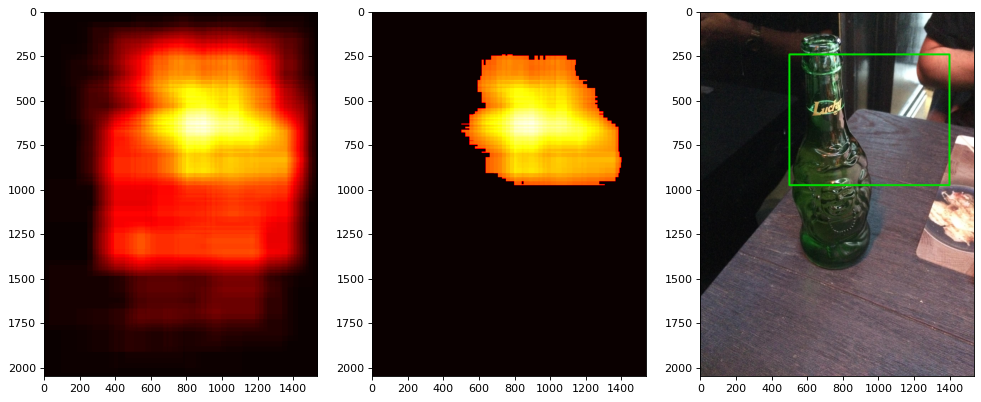

WINDOW SIZE  64   48


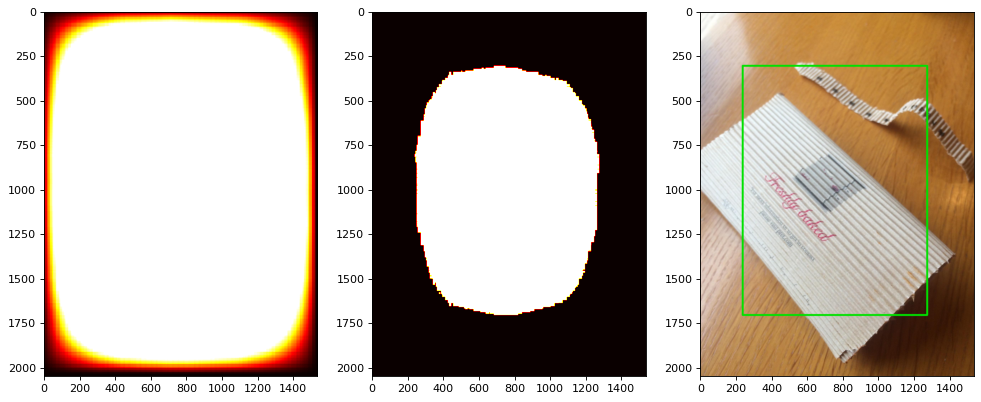

WINDOW SIZE  64   48


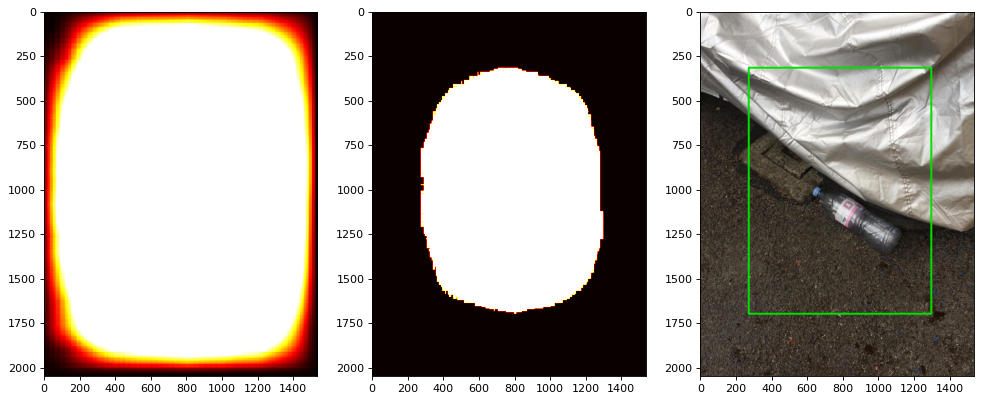

WINDOW SIZE  64   48


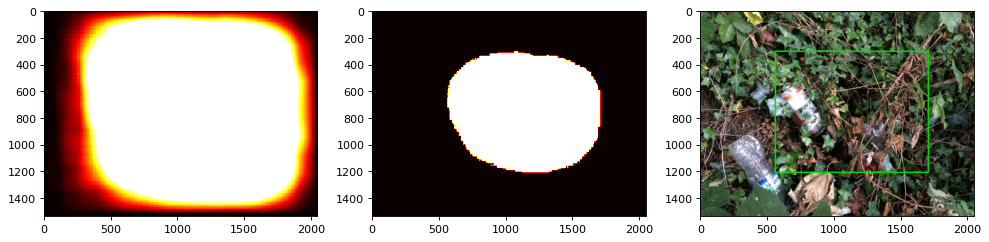

WINDOW SIZE  64   48


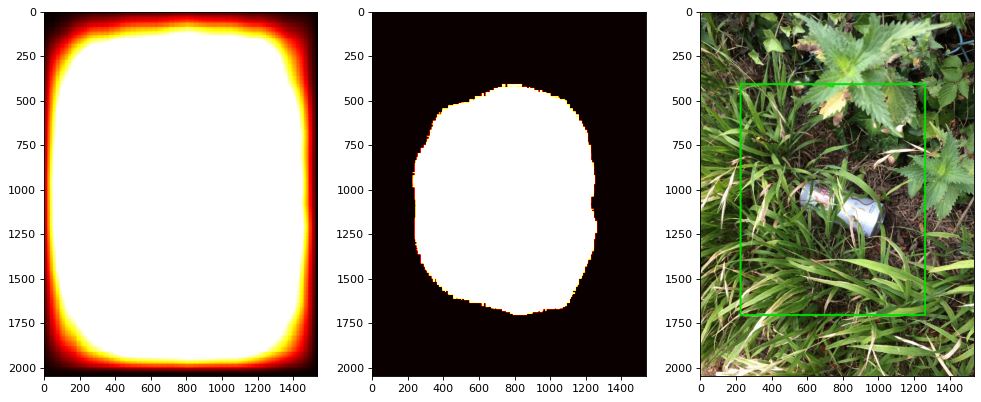

WINDOW SIZE  64   48


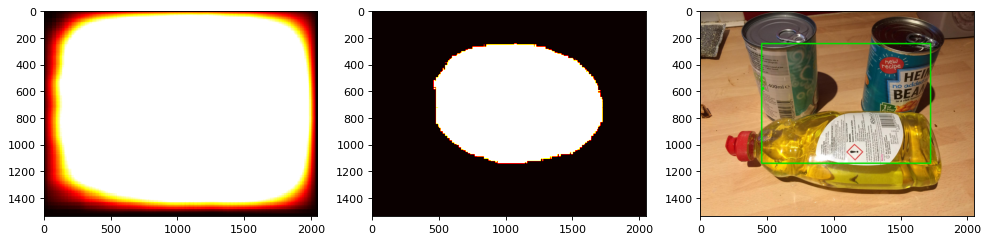

WINDOW SIZE  64   48


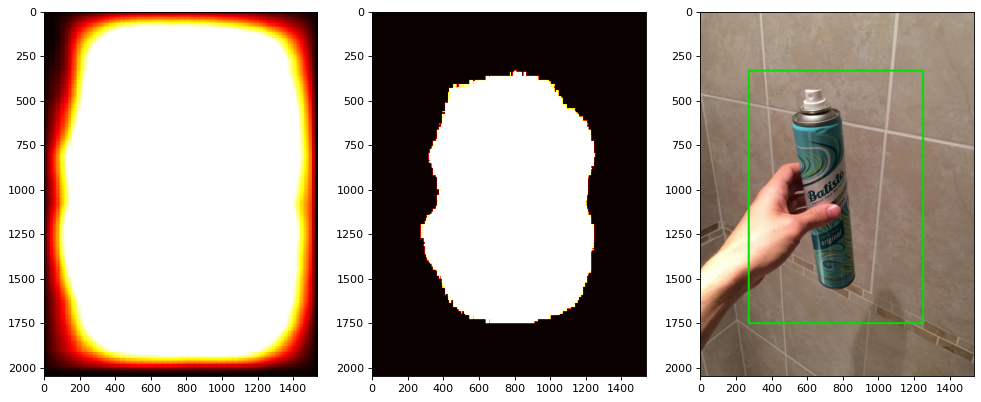

WINDOW SIZE  64   48


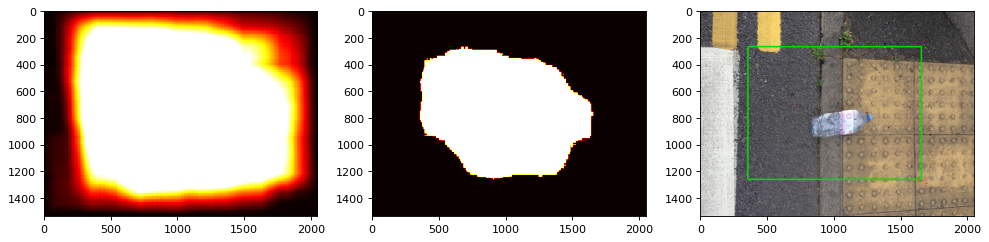

WINDOW SIZE  64   48


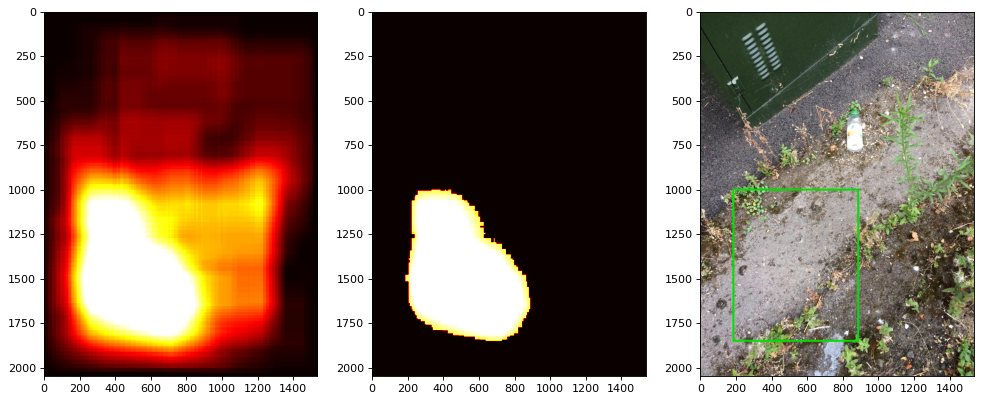

WINDOW SIZE  64   48


KeyboardInterrupt: 

In [7]:
path = "../data/test"
subdirs = [x[0] for x in os.walk(path)]                                                                            
for subdir in subdirs:                                                                                            
    files = os.walk(subdir).__next__()[2]                                                                             
    if (len(files) > 0):                                                                                          
        for file in files:    
            img_path = os.path.join(subdir,file)
            if(features == "canny"):
                src = CannyFeatureExtractor(sourcer_params, iio.imread(img_path))
            elif(features == "hog"):
                src = HogFeatureExtractor(sourcer_params, iio.imread(img_path))

            slider = Slider(sourcer = src, classifier = cls, increment = 32)

            img1 = iio.imread(img_path)

            heatmap = HeatMap(frame = img1, memory = 4)
            heatmap_test(img1, heatmap)